In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
%matplotlib inline

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import util

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.1.0


In [3]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

Train/Test Split

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [5]:
train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
184,58.0,1,145,0,25,0,219000.0,1.2,137,1,1,170,1
215,73.0,0,582,0,35,1,203000.0,1.3,134,1,0,195,0
257,58.0,0,132,1,38,1,253000.0,1.0,139,1,0,230,0
71,58.0,0,582,1,35,0,122000.0,0.9,139,1,1,71,0
90,70.0,0,66,1,45,0,249000.0,0.8,136,1,1,80,0


# Create Model 

In [6]:
import models

mobj = models.modelObj()
model = mobj.create_model(len(train.keys())-1)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                208       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [7]:
# set initial bias
neg, pos = np.bincount(df['DEATH_EVENT'])# set count negative and positive samples
initial_bias = np.log([pos/neg])

# Normalize Data

In [8]:
train_y = train.pop('DEATH_EVENT')
train_x = util.norm(train)
train_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.327273,1.0,0.014685,0.0,0.153846,0.0,0.235059,0.078652,0.65625,1.0,1.0,0.590747
1,0.600000,0.0,0.070489,0.0,0.307692,1.0,0.215663,0.089888,0.56250,1.0,0.0,0.679715
2,0.327273,0.0,0.013025,1.0,0.353846,1.0,0.276276,0.056180,0.71875,1.0,0.0,0.804270
3,0.327273,0.0,0.070489,1.0,0.307692,0.0,0.117469,0.044944,0.71875,1.0,1.0,0.238434
4,0.545455,0.0,0.004597,1.0,0.461538,0.0,0.271427,0.033708,0.62500,1.0,1.0,0.270463


# Train Model

In [9]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [10]:
non_resampled_history = model.fit(
    train_x,
    train_y,
    batch_size=mobj.BATCH_SIZE,
    epochs=mobj.EPOCHS,
    callbacks = [early_stopping, models.printDot()],
    validation_split=0.2)

Train on 191 samples, validate on 48 samples
Epoch 1/100
191/191 [==============================] - 2s 12ms/sample - loss: 1.0005 - tp: 68.0000 - fp: 121.0000 - tn: 1.0000 - fn: 1.0000 - accuracy: 0.3613 - precision: 0.3598 - recall: 0.9855 - auc: 0.4373 - val_loss: 1.0566 - val_tp: 11.0000 - val_fp: 37.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.2292 - val_precision: 0.2292 - val_recall: 1.0000 - val_auc: 0.3428
Epoch 2/100
191/191 [==============================] - 0s 235us/sample - loss: 0.9696 - tp: 69.0000 - fp: 121.0000 - tn: 1.0000 - fn: 0.0000e+00 - accuracy: 0.3665 - precision: 0.3632 - recall: 1.0000 - auc: 0.3972 - val_loss: 1.0145 - val_tp: 11.0000 - val_fp: 37.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.2292 - val_precision: 0.2292 - val_recall: 1.0000 - val_auc: 0.3329
Epoch 3/100
191/191 [==============================] - 0s 230us/sample - loss: 0.9338 - tp: 67.0000 - fp: 122.0000 - tn: 0.0000e+00 - fn: 2.0000 - accuracy: 0.3508 

Epoch 21/100
191/191 [==============================] - 0s 245us/sample - loss: 0.6943 - tp: 22.0000 - fp: 33.0000 - tn: 89.0000 - fn: 47.0000 - accuracy: 0.5812 - precision: 0.4000 - recall: 0.3188 - auc: 0.4951 - val_loss: 0.6486 - val_tp: 1.0000 - val_fp: 6.0000 - val_tn: 31.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_precision: 0.1429 - val_recall: 0.0909 - val_auc: 0.4251
Epoch 22/100
191/191 [==============================] - 0s 240us/sample - loss: 0.6842 - tp: 21.0000 - fp: 30.0000 - tn: 92.0000 - fn: 48.0000 - accuracy: 0.5916 - precision: 0.4118 - recall: 0.3043 - auc: 0.5089 - val_loss: 0.6434 - val_tp: 1.0000 - val_fp: 6.0000 - val_tn: 31.0000 - val_fn: 10.0000 - val_accuracy: 0.6667 - val_precision: 0.1429 - val_recall: 0.0909 - val_auc: 0.4349
Epoch 23/100
191/191 [==============================] - 0s 235us/sample - loss: 0.6693 - tp: 24.0000 - fp: 32.0000 - tn: 90.0000 - fn: 45.0000 - accuracy: 0.5969 - precision: 0.4286 - recall: 0.3478 - auc: 0.5581 - val_loss:

Epoch 41/100
191/191 [==============================] - 0s 219us/sample - loss: 0.6520 - tp: 17.0000 - fp: 22.0000 - tn: 100.0000 - fn: 52.0000 - accuracy: 0.6126 - precision: 0.4359 - recall: 0.2464 - auc: 0.5762 - val_loss: 0.5945 - val_tp: 0.0000e+00 - val_fp: 1.0000 - val_tn: 36.0000 - val_fn: 11.0000 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5516
Epoch 42/100
191/191 [==============================] - 0s 209us/sample - loss: 0.6732 - tp: 14.0000 - fp: 19.0000 - tn: 103.0000 - fn: 55.0000 - accuracy: 0.6126 - precision: 0.4242 - recall: 0.2029 - auc: 0.5097 - val_loss: 0.5946 - val_tp: 0.0000e+00 - val_fp: 1.0000 - val_tn: 36.0000 - val_fn: 11.0000 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5577
Epoch 43/100
191/191 [==============================] - 0s 214us/sample - loss: 0.6511 - tp: 12.0000 - fp: 13.0000 - tn: 109.0000 - fn: 57.0000 - accuracy: 0.6335 - precision: 0.4800 - recall: 0.173

191/191 [==============================] - 0s 240us/sample - loss: 0.6106 - tp: 15.0000 - fp: 5.0000 - tn: 117.0000 - fn: 54.0000 - accuracy: 0.6911 - precision: 0.7500 - recall: 0.2174 - auc: 0.6813 - val_loss: 0.5641 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 37.0000 - val_fn: 11.0000 - val_accuracy: 0.7708 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7273
Epoch 61/100
191/191 [==============================] - 0s 209us/sample - loss: 0.6373 - tp: 14.0000 - fp: 10.0000 - tn: 112.0000 - fn: 55.0000 - accuracy: 0.6597 - precision: 0.5833 - recall: 0.2029 - auc: 0.6057 - val_loss: 0.5628 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 37.0000 - val_fn: 11.0000 - val_accuracy: 0.7708 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7432
Epoch 62/100
191/191 [==============================] - 0s 204us/sample - loss: 0.6073 - tp: 17.0000 - fp: 9.0000 - tn: 113.0000 - fn: 52.0000 - accuracy: 0.6806 - precision: 0.6538 - recall: 0.2464 - auc

Epoch 80/100
191/191 [==============================] - 0s 198us/sample - loss: 0.5869 - tp: 15.0000 - fp: 12.0000 - tn: 110.0000 - fn: 54.0000 - accuracy: 0.6545 - precision: 0.5556 - recall: 0.2174 - auc: 0.7290 - val_loss: 0.5272 - val_tp: 2.0000 - val_fp: 1.0000 - val_tn: 36.0000 - val_fn: 9.0000 - val_accuracy: 0.7917 - val_precision: 0.6667 - val_recall: 0.1818 - val_auc: 0.8059
Epoch 81/100
191/191 [==============================] - 0s 225us/sample - loss: 0.6070 - tp: 20.0000 - fp: 10.0000 - tn: 112.0000 - fn: 49.0000 - accuracy: 0.6911 - precision: 0.6667 - recall: 0.2899 - auc: 0.6685 - val_loss: 0.5262 - val_tp: 2.0000 - val_fp: 1.0000 - val_tn: 36.0000 - val_fn: 9.0000 - val_accuracy: 0.7917 - val_precision: 0.6667 - val_recall: 0.1818 - val_auc: 0.8096
Epoch 82/100
191/191 [==============================] - 0s 209us/sample - loss: 0.5676 - tp: 25.0000 - fp: 10.0000 - tn: 112.0000 - fn: 44.0000 - accuracy: 0.7173 - precision: 0.7143 - recall: 0.3623 - auc: 0.7532 - val_loss

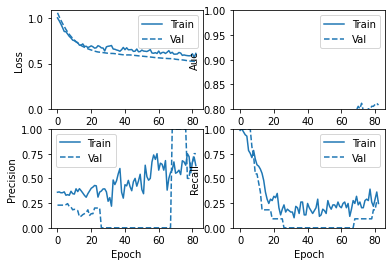

In [11]:
util.plot_metrics(non_resampled_history)

In [13]:
test_y = test.pop('DEATH_EVENT')
test_x = test
test_predictions_no_r = model.predict(test_x, batch_size=mobj.BATCH_SIZE)

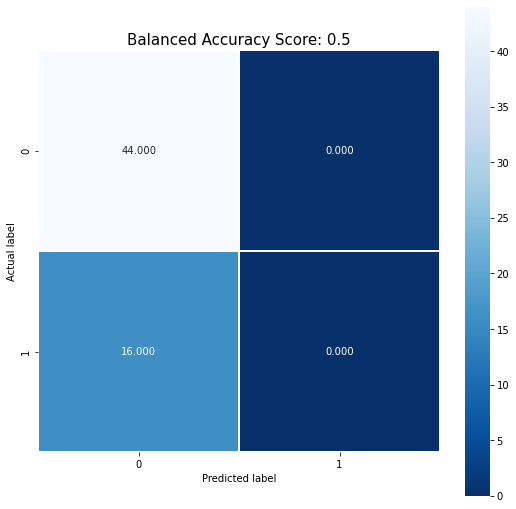

In [16]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix

bscore_no_res = balanced_accuracy_score(test_y, test_predictions_no_r)

cm = confusion_matrix(test_y, test_predictions_no_r)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Balanced Accuracy Score: {0}'.format(bscore_no_res)
plt.title(all_sample_title, size = 15);

In [18]:
no_res_results = model.evaluate(test_x, test_y,
                                  batch_size=mobj.BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, no_res_results):
  print(name, ': ', value)
print()

loss :  13813.249153645833
tp :  0.0
fp :  0.0
tn :  44.0
fn :  16.0
accuracy :  0.73333335
precision :  0.0
recall :  0.0
auc :  0.5

